
# Project: Investigate a Dataset (TMDb Movies Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>


<a id='intro'></a>
## Introduction
 This data set contains information about 10,000 movies collected from The Movie Database (TMDb), It consist of 21 columns such as popularity, budget, revenue, etc...

Lets load a TMDb Movie database csv file:

In [1]:
import csv
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# Read file and explore column names
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


### The questions I will answer in this project:
1-Are huge budgets the reason for the success of movies?
2-What kind of movies do you win and lose?

<a id='wrangling'></a>
## Data Wrangling

### General Properties
#### Obsevations from the data set:
-The columns (budget, revenue, budget_adj, revenue_adj) have not given us the currency but for this dataset we will assume that it is in dollars.

-The column vote_count is different for all the movies, so we cannot directly conculed the popularity of the movies based on the average vote count.

## Data Cleaning 
### Removing the unused information from the dataset 
#### Important observation regarding this process:

1-We need to remove unused columns: id, imdb_id, popularity, keywords, homepage, tagline, overview, runtime, vote_count, vote_average.
2-Removing the duplicacy in the rows(if any).
3-Some movies in the database have zero in budget, revenue, budget_adj, revenue_adj that is there value has not been recorded so we will be discarding such entries.
4-Changing release date column into date format.
5-Changing format of budget, revenue, budget_adj, revenue_adj columns.
6-Rename columns of budget, revenue, budget_adj, revenue_adj.

### 1.  Removing Unused columns:

In [3]:
# Creating a list of column to be deleted
del_col = ['id', 'imdb_id', 'popularity', 'homepage', 'overview', 'keywords', 
         'tagline', 'runtime', 'vote_count', 'vote_average']

# Deleting the columns
df = df.drop(del_col, 1)

# Previewing the new dataset
df.head()

,budget,revenue,original_title,cast,director,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,1.379999e+08,1.392446e+09
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015,1.379999e+08,3.481613e+08
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015,1.012000e+08,2.716190e+08
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015,1.839999e+08,1.902723e+09
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015,1.747999e+08,1.385749e+09


### 2.Removing the duplicates in the rows:

In [4]:
rows, col = df.shape
# We need to reduce the count of row by one as contain header row also.
print('The total entries of movies is: {} , The number of columns is: {}'.format(rows-1, col))

The total entries of movies is: 10865 , The number of columns is: 11


In [5]:
df.drop_duplicates(inplace=True)
rows, col = df.shape
print('The total entries of movies after drop duplicates is: {} , The nmuber of columns is: {}'.format(rows-1, col))

The total entries of movies after drop duplicates is: 10864 , The nmuber of columns is: 11


### 3. Removing (0) from budget, revenue, budget_adj, revenue_adj columns:

In [7]:
sep_list=['budget', 'revenue', 'budget_adj', 'revenue_adj']

#this will replace all the value from '0' to NAN in the list
df[sep_list] = df[sep_list].replace(0, np.NAN)

# Removing all the row which has NaN value in sep_list 
df.dropna(subset = sep_list, inplace = True)

rows, col = df.shape
print('After removing such entries, we now have only {} number of movies.'.format(rows-1))

After removing such entries, we now have only 3853 number of movies.


### 4. Changing the release date column into standard date format:

In [8]:
df.release_date = pd.to_datetime(df['release_date'])
# printing the changed dataset
df.head()

,budget,revenue,original_title,cast,director,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015,1.379999e+08,1.392446e+09
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,2015,1.379999e+08,3.481613e+08
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2015,1.012000e+08,2.716190e+08
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,2015,1.839999e+08,1.902723e+09
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2015,1.747999e+08,1.385749e+09


### 5. Changing format of budget, revenue, budget_adj, revenue_adj columns:

In [9]:
# Printing the data type of the data set
df.dtypes

budget                         float64
revenue                        float64
original_title                  object
cast                            object
director                        object
genres                          object
production_companies            object
release_date            datetime64[ns]
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

In [10]:
change_type=['budget', 'revenue', 'budget_adj', 'revenue_adj']

# Changing data type
df[change_type]= df[change_type].applymap(np.int64)

# Checking data type
df.dtypes

budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
genres                          object
production_companies            object
release_date            datetime64[ns]
release_year                     int64
budget_adj                       int64
revenue_adj                      int64
dtype: object

### 6. Rename the budget, revenue,budget_adj, revenue_adj columns and put them with Us Dollar currency.

In [11]:
#rename function renames the columns, the key as being the old name and its value new name of it in form of dictionary.
df.rename(columns = {'budget' : 'budget Us-$', 'revenue' : 'revenue Us-$', 'budget_adj' : 'budget_adj Us-$', 'revenue_adj': 'revenue_adj Us-$'}, inplace = True)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1(Are huge budgets the reason for the success of movies)

### Calculating the profit of the each movie

In [12]:
# insert function with parameters (index of the column in the dataset, name of the column, value to be inserted)
df.insert(2, 'profit_margin', df['revenue Us-$']-df['budget Us-$'])
df.head()

,budget Us-$,revenue Us-$,profit_margin,original_title,cast,director,genres,production_companies,release_date,release_year,budget_adj Us-$,revenue_adj Us-$
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015,137999939,1392445892
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,2015,137999939,348161292
2,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2015,101199955,271619025
3,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,2015,183999919,1902723129
4,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2015,174799923,1385748801


### Exploration the margin profit

### Split the profit_margin column to sort by winning and loss

In [13]:
# Splits the values on profit_margin column on two columns one for winnings and the other for loss.
df['winnings'] = df.profit_margin.where(df.profit_margin > 0, 0)
df['loss'] = -1 * df.profit_margin.where(df.profit_margin < 0, 0)

In [14]:
import pprint
def calculate(col):
    # For highest margin profit
    high = df[col].idxmax()
    high_details = pd.DataFrame(df.loc[high])
    
    # For lowest margin profit
    low = df[col].idxmin()
    low_details = pd.DataFrame(df.loc[low])
    
    # Collection data 
    info = pd.concat([high_details, low_details], axis=1)
    return info
calculate ('profit_margin')

,1386,2244
budget Us-$,237000000,425000000
revenue Us-$,2781505847,11087569
profit_margin,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Boram Entertainment Inc.
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00
release_year,2009,2010


The a djusted budget for the Avatar movie is 240886902 million Dollar with winnings is 2544505847 billion Dollar.
Normal budget and  high profit.
While the adjusted budget for the Warrior's Way is 425000000 million Dollar with loss is 413912431 million Dollar.
high budget with high loss.

In [15]:
df.sort_values(by=['winnings', 'budget Us-$'], ascending=False)

,budget Us-$,revenue Us-$,profit_margin,original_title,cast,director,genres,production_companies,release_date,release_year,budget_adj Us-$,revenue_adj Us-$,winnings,loss
1386,237000000,2781505847,2544505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,2009,240886902,2827123750,2544505847,0
3,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,2015,183999919,1902723129,1868178225,0
5231,200000000,1845034188,1645034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,1997,271692064,2506405735,1645034188,0
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015,137999939,1392445892,1363528810,0
4,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2015,174799923,1385748801,1316249360,0
4361,220000000,1519557910,1299557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,Science Fiction|Action|Adventure,Marvel Studios,2012-04-25,2012,208943741,1443191435,1299557910,0
3374,125000000,1327817822,1202817822,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,2011-07-07,2011,121174755,1287183997,1202817822,0
14,280000000,1405035767,1125035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,2015-04-22,2015,257599886,1292632336,1125035767,0
5422,150000000,1274219009,1124219009,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,Animation|Adventure|Family,Walt Disney Pictures|Walt Disney Animation Stu...,2013-11-27,2013,140405002,1192711491,1124219009,0
8094,22000000,1106279658,1084279658,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Irwin Winkler,Crime|Drama|Mystery|Thriller|Action,Columbia Pictures,1995-07-28,1995,31481271,1583049536,1084279658,0


High profits against moderate budgets.

In [17]:
df.sort_values(by=['loss', 'budget Us-$'], ascending=False)

,budget Us-$,revenue Us-$,profit_margin,original_title,cast,director,genres,production_companies,release_date,release_year,budget_adj Us-$,revenue_adj Us-$,winnings,loss
2244,425000000,11087569,-413912431,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,2010,425000000,11087569,0,413912431
5508,255000000,89289910,-165710090,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,Gore Verbinski,Action|Adventure|Western,Walt Disney Pictures|Jerry Bruckheimer Films|I...,2013-07-03,2013,238688504,83578333,0,165710090
7031,145000000,25819961,-119180039,The Alamo,Dennis Quaid|Billy Bob Thornton|Jason Patric|P...,John Lee Hancock,Western|History|War,Imagine Entertainment|Touchstone Pictures,2004-04-07,2004,167394582,29807735,0,119180039
3484,150000000,38992758,-111007242,Mars Needs Moms,Seth Green|Joan Cusack|Dan Fogler|Breckin Meye...,Simon Wells,Adventure|Animation|Family,Walt Disney Animation Studios,2011-03-09,2011,145409706,37799503,0,111007242
4970,100000000,250,-99999750,Brother Bear,Joaquin Phoenix|Jeremy Suarez|Rick Moranis|Joa...,Aaron Blaise|Robert Walker,Animation|Adventure|Family|Fantasy,Walt Disney Pictures|Walt Disney Feature Anima...,2003-10-20,2003,118535264,296,0,99999750
2435,160000000,61698899,-98301101,The 13th Warrior,Antonio Banderas|Vladimir Kulich|Dennis StorhÃ...,John McTiernan,Adventure|Fantasy|Action,Touchstone Pictures,1999-08-27,1999,209448455,80767119,0,98301101
4078,100000000,7103973,-92896027,The Adventures of Pluto Nash,Eddie Murphy|Randy Quaid|Rosario Dawson|Joe Pa...,Ron Underwood,Action|Comedy|Science Fiction,Village Roadshow Pictures|Castle Rock Entertai...,2002-08-15,2002,121226139,8611872,0,92896027
6707,85000000,144,-84999856,Charlotte's Web,Julia Roberts|Steve Buscemi|John Cleese|Oprah ...,Gary Winick,Comedy|Family|Fantasy,Paramount Pictures|Kerner Entertainment Company,2006-12-15,2006,91941878,155,0,84999856
6590,149000000,64459316,-84540684,Flushed Away,Hugh Jackman|Kate Winslet|Ian McKellen|Jean Re...,David Bowers|Sam Fell,Adventure|Animation|Comedy|Family,Aardman Animations|DreamWorks Animation,2006-10-22,2006,161168704,69723654,0,84540684
2915,130000000,49554002,-80445998,Australia,Nicole Kidman|Hugh Jackman|Essie Davis|David W...,Baz Luhrmann,Drama,Bazmark Films|Ingenious Film Partners|Twentiet...,2008-11-18,2008,131662262,50187630,0,80445998


High losses against huge budgets.

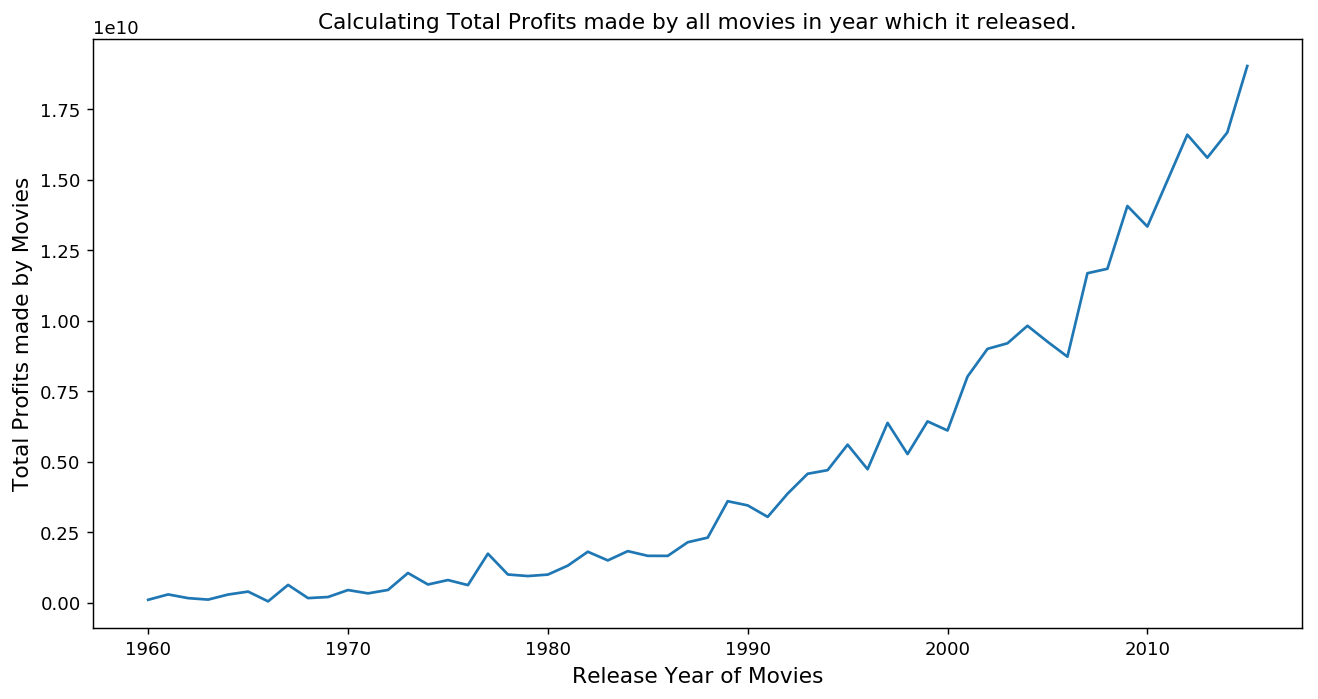

In [18]:
#Since we want to know the profits of movies for every year we need to group all the movies for those years
#the groupby function below collects all the movies for that year and then the profits of all those movies for that
#years is been added and storing all this in variable
profits_each_year = df.groupby('release_year')['profit_margin'].sum()

#giving the figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#labeling x-axis
plt.xlabel('Release Year of Movies', fontsize = 12)
#labeling y-axis
plt.ylabel('Total Profits made by Movies', fontsize = 12)
#title of a the plot
plt.title('Calculating Total Profits made by all movies in year which it released.')

#plotting what needs to be plotted
plt.plot(profits_each_year)

#showing the plot
plt.show()

##### Over the years we see that profits are increasing.
 Before i explain lets understand what the y axis shows us. Each values in the y-axis is been multiplied to '1e10' (as shown above the plot). Since the profits of movies are high, having 9+ digits, cannot fit the axis. So for example at the year 2012, the y-aixs value is around 1.70, which means that the profit at that year made by al movies released in that year is 1.70x1e10 =  17000000000 which is 17 billion dollars.
The year 2015, shows us the highest peak, having the highest profit than in any year, of more than 18 billion dollars. This graph doesn't exactly prove us that every year pass by, the profits of movies will increase but when we see in terms of decades it does show significant uprise in profits. At the year 2000, profits were around 8 biilion dollars, but in just 15 years it increased by 10+ biilion dollars. Last 15 years had a significant rise in profits compared to any other decades as we can see in the graph.

Not every year had same amount of movies released, the year 2015 had the most movie releases than in any other year. The more old the movies, the more less releases at that year (atleast this is what the dataset shows us).

 This dataset also doesn't show all the movies that has been released in each year. If it would the graph might would show some different trend.

 Also to note, In the dataset, there were also movies that had negative profits which drags down the the profits of other movies in those years. So we are not just calculating the movies which made profits, but also which went in loss! The highest profit making movie Avatar in 2009 alone drags the profit up by 2.5 billion dollars out of 14 billion dollars(calculations below)

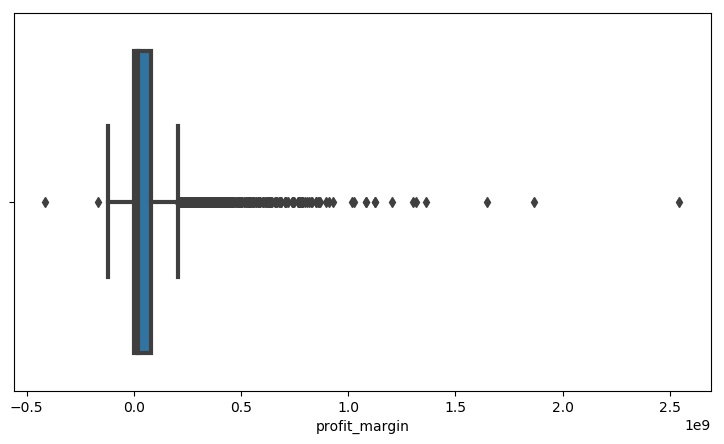

In [19]:
import seaborn as sns
# The First plot is box plot of the margin profit of the movies 
plt.figure(figsize=(9,5), dpi = 100)
sns.boxplot(df['profit_margin'], linewidth = 3)

plt.show()

In the In the visualization above shows us the right skewed distribution for margin profit.

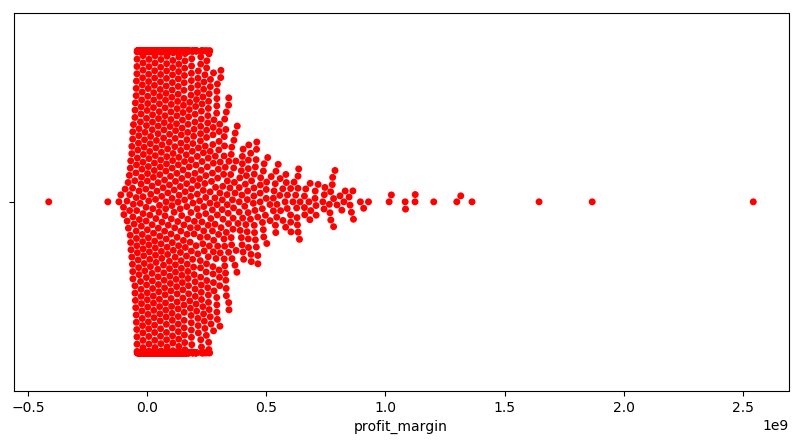

In [20]:
# The Second plots is the data points plot of margin profit of movies

plt.figure(figsize=(10,5), dpi = 100)
#using seaborn to generate the plot
sns.swarmplot(df['profit_margin'], color = 'red')

plt.show()

 In the visualization above shows us the overall distribution of margin profit  of movies by plotting the points where they lie in the ditribution and how many movies percent of movies lie below the profit.

What's amazing about box-plot is that it gives us an overall idea of how spread the ditribution in our case the margin profit of movies are. First of all what we get from this visualization is how many outliers we have, the min and max points, the median and IQR.

As we already saw in our previous calculations of least and highest margin profit, this is the appropriate visualization in the comparison of other movies margin profit. By looking at the box-plot we don't get the exact values, but by giving the describe function above we get the exact values.

In [35]:
df['profit_margin'].describe()

count    3.854000e+03
mean     7.048292e+07
std      1.506195e+08
min     -4.139124e+08
25%     -1.321535e+06
50%      2.002019e+07
75%      8.170331e+07
max      2.544506e+09
Name: profit_margin, dtype: float64

##### by looking at both, visualiztions and calculations, we can say that:

The 25% of movies have margin profit less than 1321535 Dollar.
The 50% of movies have margin profit less than 20020190 Dollar.
The 75% of movies have margin profit less than 81703310 Dollar.

In [22]:
#shows which year made the highest profit
profits_each_year.idxmax()

2015

In [23]:
#storing the values in the the form of DataFrame just to get a clean and better visual output
profits_each_year = pd.DataFrame(profits_each_year)
#printing out
profits_each_year.tail()

,profit_margin
release_year,
2011,14966694704
2012,16596845507
2013,15782743325
2014,16676201357
2015,19032145273


2015 was the year where movies made the highest profit of about 19.4+ billion dollars which released in that year.

## Research Question 2(What kind of movies do you win and lose)

In [24]:
Drama=df.groupby('genres')['winnings'].sum()['Drama']
Action=df.groupby('genres')['winnings'].sum()['Action']
Comedy=df.groupby('genres')['winnings'].sum()['Comedy']
Adventure=df.groupby('genres')['loss'].sum()['Adventure']
Thriller=df.groupby('genres')['winnings'].sum()['Thriller']
Fantasy=df.groupby('genres')['winnings'].sum()['Fantasy']
Romance=df.groupby('genres')['winnings'].sum()['Romance']
Animation=df.groupby('genres')['winnings'].sum()['Animation']
Mystery=df.groupby('genres')['winnings'].sum()['Mystery']
Horror=df.groupby('genres')['winnings'].sum()['Horror']
Music=df.groupby('genres')['winnings'].sum()['Music']
War=df.groupby('genres')['winnings'].sum()['War']
History=df.groupby('genres')['winnings'].sum()['History']
Western=df.groupby('genres')['winnings'].sum()['Western']
Documentary=df.groupby('genres')['winnings'].sum()['Documentary']
print(Drama, 'Drama total winnings')
print(Action, 'Action total winnings')
print(Comedy, 'Comedy total winnings')
print(Adventure, 'Adventure total winnings')
print(Thriller, 'Thriller total winnings')
print(Fantasy, 'Fantasy total winnings')
print(Romance, 'Romance total winnings')
print(Animation, 'Animation total winnings')
print(Mystery, 'Mystery total winnings')
print(Horror, 'Horror total winnings')
print(Music, 'Music total winnings')
print(War, 'War total winnings')
print(History, 'History total winnings')
print(Western, 'Western total winnings')
print(Documentary, 'Documentary total winnings')



10006767837 Drama total winnings
1246183205 Action total winnings
12645362591 Comedy total winnings
19694930 Adventure total winnings
360454254 Thriller total winnings
250979743 Fantasy total winnings
69594140 Romance total winnings
256805364 Animation total winnings
6640084 Mystery total winnings
2351230878 Horror total winnings
225202706 Music total winnings
35804635 War total winnings
264317794 History total winnings
216269960 Western total winnings
369969450 Documentary total winnings


In [25]:
Drama=df.groupby('genres')['loss'].sum()['Drama']
Action=df.groupby('genres')['loss'].sum()['Action']
Comedy=df.groupby('genres')['loss'].sum()['Comedy']
Adventure=df.groupby('genres')['loss'].sum()['Adventure']
Thriller=df.groupby('genres')['loss'].sum()['Thriller']
Fantasy=df.groupby('genres')['loss'].sum()['Fantasy']
Romance=df.groupby('genres')['loss'].sum()['Romance']
Animation=df.groupby('genres')['loss'].sum()['Animation']
Mystery=df.groupby('genres')['loss'].sum()['Mystery']
Horror=df.groupby('genres')['loss'].sum()['Horror']
Music=df.groupby('genres')['loss'].sum()['Music']
War=df.groupby('genres')['loss'].sum()['War']
History=df.groupby('genres')['loss'].sum()['History']
Western=df.groupby('genres')['loss'].sum()['Western']
Documentary=df.groupby('genres')['loss'].sum()['Documentary']
print(Drama, 'Drama total loss')
print(Action, 'Action total loss')
print(Comedy, 'Comedy total loss')
print(Adventure, 'Adventure total loss')
print(Thriller, 'Thriller total loss')
print(Fantasy, 'Fantasy total loss')
print(Romance, 'Romance total loss')
print(Animation, 'Animation total loss')
print(Mystery, 'Mystery total loss')
print(Horror, 'Horror total loss')
print(Music, 'Music total loss')
print(War, 'War total loss')
print(History, 'History total loss')
print(Western, 'Western total loss')
print(Documentary, 'Documentary total loss')



956665038 Drama total loss
137677692 Action total loss
462283949 Comedy total loss
19694930 Adventure total loss
167182648 Thriller total loss
12000000 Fantasy total loss
0 Romance total loss
3711308 Animation total loss
0 Mystery total loss
21766979 Horror total loss
10027033 Music total loss
0 War total loss
0 History total loss
0 Western total loss
8099851 Documentary total loss


In [30]:
# Function which will take any column as argument  
def data(col):
    
    data = df[col].str.cat(sep='|')
    
    data = pd.Series(data.split('|'))
    
    count = data.value_counts(ascending = False)
    
    return count

In [31]:
# Variable to store the retured value
count = data('genres')

count

Drama              1756
Comedy             1358
Thriller           1204
Action             1085
Adventure           749
Romance             667
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               136
History             129
War                 119
Western              52
Documentary          35
Foreign              13
TV Movie              1
dtype: int64

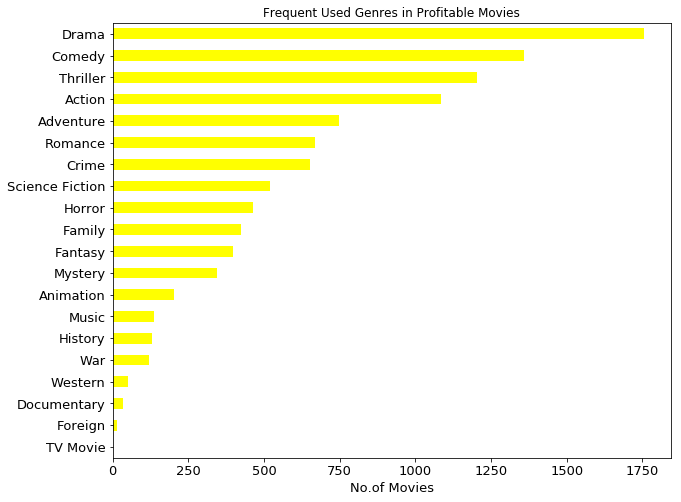

In [32]:
# Plot the points in descending order top to bottom as we have data in same format.
count.sort_values(ascending = True, inplace = True)


plot = count.plot.barh(color = 'yellow', fontsize = 13)

plot.set(title = 'Frequent Used Genres in Profitable Movies')

plot.set_xlabel('No.of Movies', color = 'black', fontsize = '13')

plot.figure.set_size_inches(10, 8)

plt.show()

In the visualization above shows, Frequent Used Genres in Profitable Movies from number of all movies.

## Conclusion


Not all Hollywood movies make big profits, and not all movies with huge budgets make huge profits. There are films that have missed expectations, small budgets, huge profits, huge budget movies and unprecedented losses when they were shown.
These films prove to us that it is not huge budgets make films .. But there is a good story knitted carefully and a scenario rich events ... And heroes have been carefully selected and the crews of production and implementation and directed were placed in their right place and also the types of movies there I It has high revenues and losses that affect the quality of those films provided to the viewer and there are films with revenues are not high but there are no losses.

Limitations: The details provided are not enough to get more accurate answers in the budget. For example, how much did the actor, director and other film producers take, and these details are important for me to diagnose the reasons for the profit and loss and the misuse of money in the film industry.

In [36]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295